In [14]:
from cvxpy import *
import numpy as np
import pandas as pd
from itertools import combinations
import time
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
#number_games = 45 
number_days = 35
number_teams = 10
matchups = list(combinations(range(number_teams),2))
number_games = len(matchups)

game_values = np.random.randint(10, size=(number_games,number_days))
game_day = np.array([np.array(range(number_days)) for x in range(number_games)]) + 1

In [7]:
day_constraints = np.array([1 if x%7 <= 4 else 2 for x in range(number_days)])

In [8]:
game_costs = pd.DataFrame(game_values, columns = range(game_values.shape[1]), index= range(game_values.shape[0]))
game_costs['matchups'] = matchups

In [9]:
installed_solvers()

['CVXOPT', 'ECOS', 'GLPK', 'GLPK_MI', 'MOSEK', 'OSQP', 'SCS']

In [10]:
#Declare variables
C = Variable(shape = (number_games, number_days), boolean = True)
#V = Constant(game_values)

In [11]:
#Define the Optimization Problem
t1 = time.time()

prob = Problem(Maximize(sum(multiply(C, game_values))),
              [
                  sum(C, axis=0) == day_constraints,
                  sum(C, axis=1) == 1
              ]
              
              )

prob.solve(
            verbose = True,
            solver = MOSEK,
            #mi_max_iters = 10000
)

t2 = time.time()



Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : LO (linear optimization problem)
  Constraints            : 80              
  Cones                  : 0               
  Scalar variables       : 1575            
  Matrix variables       : 0               
  Integer variables      : 1575            

Optimizer started.
Mixed integer optimizer started.
Threads used: 4
Presolve started.
Presolve terminated. Time = 0.23
Presolved problem: 1575 variables, 80 constraints, 3150 non-zeros
Presolved problem: 0 general integer, 1575 binary, 0 continuous
Clique table size: 70
BRANCHES RELAXS   ACT_NDS  DEPTH    BEST_INT_OBJ         BEST_RELAX_OBJ       REL_GAP(%)  TIME  
0        0        1        0        -2.2300000000e+02    NA                   NA          0.3   
0        1        1        0        -4.0300000000e+02    -4.0300000000e+02    0.00e+00    0.3   
An optimal solution satisfying the relative gap tolerance o

In [12]:
prob.value

403.0

In [44]:
np.multiply(C.value,game_values).sum()

402.0

In [17]:
soln = pd.DataFrame(np.round(C.value), dtype=bool)

<AxesSubplot:>

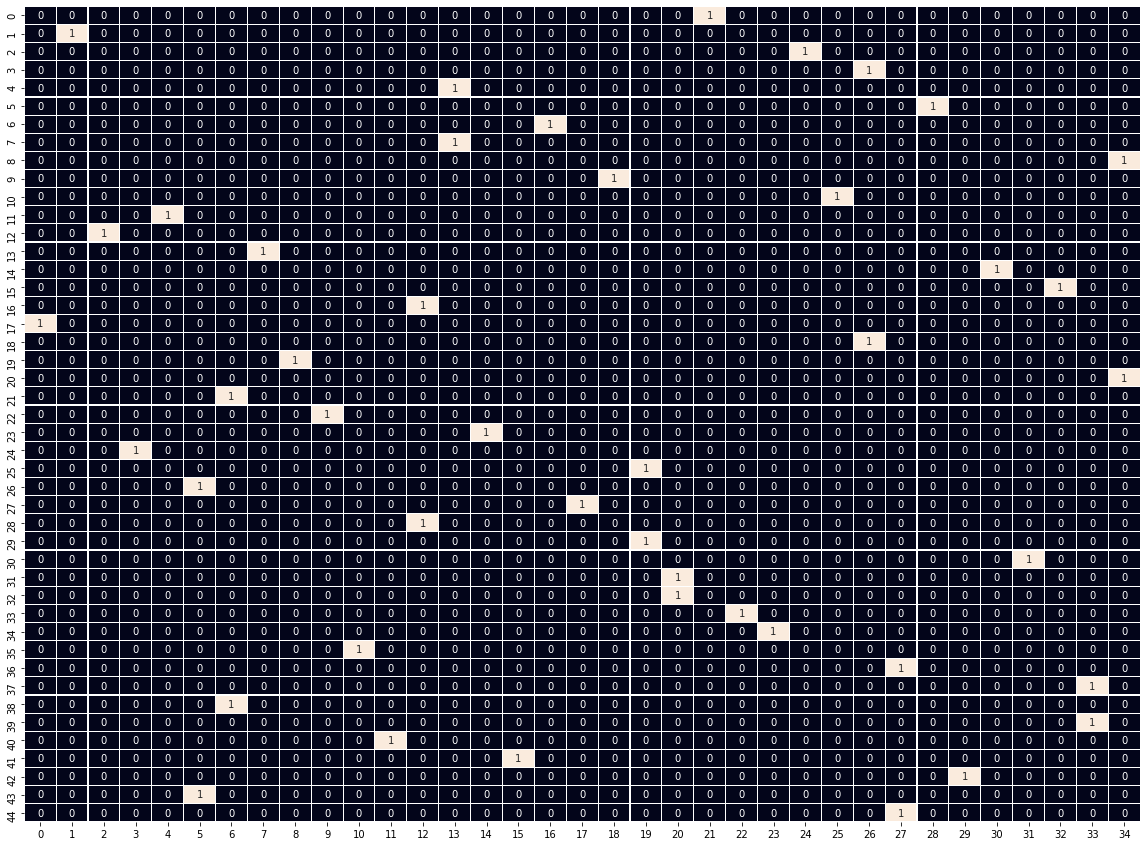

In [19]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(soln, linecolor = 'white', linewidths = 0.1, annot = True, ax = ax, cbar =False)

In [23]:
soln.sum(axis=0)

0     1
1     1
2     1
3     1
4     1
5     2
6     2
7     1
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    1
17    1
18    1
19    2
20    2
21    1
22    1
23    1
24    1
25    1
26    2
27    2
28    1
29    1
30    1
31    1
32    1
33    2
34    2
dtype: int64